# Cuantización de Colores con K Means

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Recuperar la imagen

In [2]:
imagen_arreglo = mpimg.imread('palm_trees.jpg')

In [3]:
# Imagen de 1401 píxeles de alto
# con 934 píxeles de ancho y
# 3 canales (R G B) (Rojo Verde Azúl)
imagen_arreglo.shape

(1401, 934, 3)

In [4]:
#Pixel(0,0)
imagen_arreglo[0][0]

array([ 25,  89, 127], dtype=uint8)

In [5]:
#Pixel(1400,933)
imagen_arreglo[1400][933]

array([10, 10, 12], dtype=uint8)

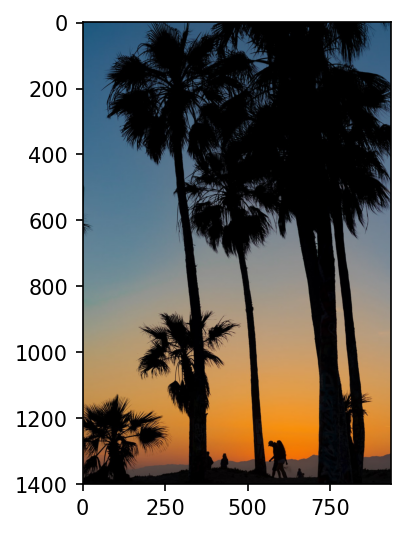

In [6]:
plt.figure(figsize=(5,4),dpi=150)
plt.imshow(imagen_arreglo)

### Uso de K Means para la Cuantización de colores
Significa reducir el número de colores únicos a una cantidad de K colores. Para el ejemplo tomaremos un K = 5

In [14]:
# al = alto
# an = ancho
# ca = canales
(al,an,ca) = imagen_arreglo.shape

Conversión de la dimensión de la matriz de imagen de 3d a 2d usando (al,an,ca) --> (h*w,c)

In [15]:
imagen_arreglo_2d = imagen_arreglo.reshape(al*an,ca)

In [16]:
# Se tiene 1 308 534 píxeles
imagen_arreglo_2d.shape

(1308534, 3)

In [17]:
# Los 10 primeros pixeles
imagen_arreglo_2d[0:10]

array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       [ 26,  88, 127],
       [ 26,  88, 127],
       [ 27,  89, 128],
       [ 27,  89, 128]], dtype=uint8)

In [18]:
from sklearn.cluster import KMeans

In [19]:
modelo = KMeans(n_clusters=5)

In [20]:
modelo.fit(imagen_arreglo_2d)

KMeans(n_clusters=5)

In [21]:
etiquetas = modelo.predict(imagen_arreglo_2d)

In [22]:
etiquetas

array([2, 2, 2, ..., 4, 4, 4])

In [23]:
# Centroides del modelo (Colores)
modelo.cluster_centers_

array([[ 67.06180739,  61.92002838,  62.80167709],
       [156.42430527, 149.13899962, 135.70805029],
       [ 76.74569993, 113.08445881, 139.48533725],
       [213.29197627, 142.51905131,  64.9854998 ],
       [  2.76150612,   2.57795729,   3.70097947]])

In [24]:
codigos_rgb = modelo.cluster_centers_.round(0).astype(int)

In [25]:
codigos_rgb

array([[ 67,  62,  63],
       [156, 149, 136],
       [ 77, 113, 139],
       [213, 143,  65],
       [  3,   3,   4]])

In [26]:
nueva_imagen = np.reshape(codigos_rgb[etiquetas],(al,an,ca))

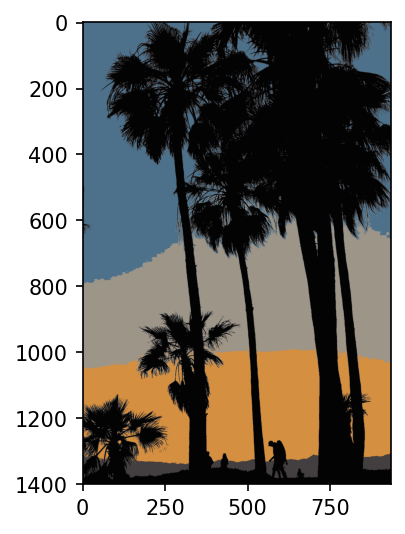

In [27]:
plt.figure(figsize=(5,4),dpi=150)
plt.imshow(nueva_imagen)

In [28]:
plt.imsave("nueva_imagen.jpg",np.uint8(nueva_imagen))